In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
from nnsight import LanguageModel
from activation_utils import load_model
from transformers import AutoModelForCausalLM, AutoTokenizer
import json
from typing import Dict, Any, List

torch.set_grad_enabled(False)

/share/u/can/miniconda3/envs/reference_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Example usage
from dataset_utils import generate_dataset, process_dataset, print_processed_example
from generation import filter_correct
from tqdm import tqdm

num_samples = 100
total_length = 100
random_offset = True

baseline_accuracies = {}
model_ids = [
    # "meta-llama/Llama-3.2-1B",
    "google/gemma-2-2b",
    # "google/gemma-2-9b",
    # 'meta-llama/Llama-3.1-8B'
]
for model_id in model_ids:
    baseline_accuracies[model_id] = {}
    model = load_model(model_id)
    model.tokenizer.pad_token = model.tokenizer.eos_token
    for base_question_order in range(5):
        baseline_accuracies[model_id][base_question_order] = []
        for _ in tqdm(range(10)):
            base_entity_categories = ["first_names1"]
            base_attribute_categories = ["weekday"]

            # Generate dataset
            base_dataset = generate_dataset(
                num_samples=num_samples,
                selected_entity_categories=base_entity_categories,
                selected_attribute_categories=base_attribute_categories,
                sample_entities_randomly=True,
                sample_attributes_randomly=True,
                question_order=base_question_order,
                selected_template_categories=["time_templates"],
                templates_file="data/templates_box.json",
                raw_dataset_path=None,
            )

            # print(base_dataset[0]['text'])
            # break

            # Process and tokenize dataset
            base_dataset = process_dataset(
                base_dataset,
                model.tokenizer,
                ctx_length_with_pad=total_length,
                random_offset=random_offset,
                save_path=None,
            )

            print_processed_example(base_dataset[0], model.tokenizer)

            _, base_accuracy = filter_correct(model, base_dataset)
            print(f"Base accuracy: {base_accuracy:.2f}")
            baseline_accuracies[model_id][base_question_order].append(base_accuracy)

  0%|          | 0/10 [00:00<?, ?it/s]

Original text: First, we're scheduled to meet Anthony on Thursday, followed by Ethan on Tuesday. Then we'll connect with Oliver on Saturday, Andrew on Monday, and finally Lucas on Sunday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Anthony', 'e1': 'Ethan', 'e2': 'Oliver', 'e3': 'Andrew', 'e4': 'Lucas', 'a0': 'Thursday', 'a1': 'Tuesday', 'a2': 'Saturday', 'a3': 'Monday', 'a4': 'Sunday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Anthony <-- e0
Position 10: ▁on
Position 11: ▁Thursday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Ethan <-- e1
Position 16: ▁on
Position 17: ▁Tuesday <-- a1
Position 1

 10%|█         | 1/10 [00:03<00:34,  3.79s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Henry on Tuesday, followed by Cameron on Friday. Then we'll connect with Gabriel on Sunday, Zachary on Wednesday, and finally Christian on Monday. Just to confirm - on Tuesday, we're meeting with
key_to_word: {'e0': 'Henry', 'e1': 'Cameron', 'e2': 'Gabriel', 'e3': 'Zachary', 'e4': 'Christian', 'a0': 'Tuesday', 'a1': 'Friday', 'a2': 'Sunday', 'a3': 'Wednesday', 'a4': 'Monday', 'a_question': 'Tuesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Henry <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Cameron <-- e1
Position 16: ▁on
Position 17:

 20%|██        | 2/10 [00:07<00:29,  3.66s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Gavin on Tuesday, followed by Samuel on Monday. Then we'll connect with Alexander on Wednesday, Lucas on Sunday, and finally Michael on Thursday. Just to confirm - on Tuesday, we're meeting with
key_to_word: {'e0': 'Gavin', 'e1': 'Samuel', 'e2': 'Alexander', 'e3': 'Lucas', 'e4': 'Michael', 'a0': 'Tuesday', 'a1': 'Monday', 'a2': 'Wednesday', 'a3': 'Sunday', 'a4': 'Thursday', 'a_question': 'Tuesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Gavin <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Samuel <-- e1
Position 16: ▁on
Position 17: ▁M

 30%|███       | 3/10 [00:10<00:25,  3.63s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Connor on Friday, followed by Grayson on Wednesday. Then we'll connect with William on Tuesday, Charlie on Thursday, and finally Andrew on Monday. Just to confirm - on Friday, we're meeting with
key_to_word: {'e0': 'Connor', 'e1': 'Grayson', 'e2': 'William', 'e3': 'Charlie', 'e4': 'Andrew', 'a0': 'Friday', 'a1': 'Wednesday', 'a2': 'Tuesday', 'a3': 'Thursday', 'a4': 'Monday', 'a_question': 'Friday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Connor <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Grayson <-- e1
Position 16: ▁on
Position 17: ▁

 40%|████      | 4/10 [00:14<00:21,  3.62s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Dylan on Wednesday, followed by David on Monday. Then we'll connect with Jacob on Friday, Aiden on Saturday, and finally Nathan on Thursday. Just to confirm - on Wednesday, we're meeting with
key_to_word: {'e0': 'Dylan', 'e1': 'David', 'e2': 'Jacob', 'e3': 'Aiden', 'e4': 'Nathan', 'a0': 'Wednesday', 'a1': 'Monday', 'a2': 'Friday', 'a3': 'Saturday', 'a4': 'Thursday', 'a_question': 'Wednesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Dylan <-- e0
Position 10: ▁on
Position 11: ▁Wednesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁David <-- e1
Position 16: ▁on
Position 17: ▁Monday

 50%|█████     | 5/10 [00:18<00:18,  3.60s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Benjamin on Saturday, followed by Liam on Wednesday. Then we'll connect with Oliver on Thursday, Lucas on Sunday, and finally Hunter on Monday. Just to confirm - on Saturday, we're meeting with
key_to_word: {'e0': 'Benjamin', 'e1': 'Liam', 'e2': 'Oliver', 'e3': 'Lucas', 'e4': 'Hunter', 'a0': 'Saturday', 'a1': 'Wednesday', 'a2': 'Thursday', 'a3': 'Sunday', 'a4': 'Monday', 'a_question': 'Saturday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Benjamin <-- e0
Position 10: ▁on
Position 11: ▁Saturday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Liam <-- e1
Position 16: ▁on
Position 17: ▁W

 60%|██████    | 6/10 [00:21<00:14,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Jacob on Sunday, followed by James on Friday. Then we'll connect with Tyler on Tuesday, Jack on Saturday, and finally Logan on Thursday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'Jacob', 'e1': 'James', 'e2': 'Tyler', 'e3': 'Jack', 'e4': 'Logan', 'a0': 'Sunday', 'a1': 'Friday', 'a2': 'Tuesday', 'a3': 'Saturday', 'a4': 'Thursday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Jacob <-- e0
Position 10: ▁on
Position 11: ▁Sunday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁James <-- e1
Position 16: ▁on
Position 17: ▁Friday <-- a1
Position 

 70%|███████   | 7/10 [00:25<00:10,  3.58s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Tyler on Tuesday, followed by Carter on Wednesday. Then we'll connect with Dylan on Thursday, James on Friday, and finally Christian on Saturday. Just to confirm - on Tuesday, we're meeting with
key_to_word: {'e0': 'Tyler', 'e1': 'Carter', 'e2': 'Dylan', 'e3': 'James', 'e4': 'Christian', 'a0': 'Tuesday', 'a1': 'Wednesday', 'a2': 'Thursday', 'a3': 'Friday', 'a4': 'Saturday', 'a_question': 'Tuesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Tyler <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Carter <-- e1
Position 16: ▁on
Position 17: ▁W

 80%|████████  | 8/10 [00:28<00:07,  3.58s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Anthony on Sunday, followed by Gavin on Saturday. Then we'll connect with Charlie on Friday, Jackson on Tuesday, and finally Caleb on Wednesday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'Anthony', 'e1': 'Gavin', 'e2': 'Charlie', 'e3': 'Jackson', 'e4': 'Caleb', 'a0': 'Sunday', 'a1': 'Saturday', 'a2': 'Friday', 'a3': 'Tuesday', 'a4': 'Wednesday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Anthony <-- e0
Position 10: ▁on
Position 11: ▁Sunday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Gavin <-- e1
Position 16: ▁on
Position 17: ▁Satur

 90%|█████████ | 9/10 [00:32<00:03,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Connor on Saturday, followed by Lucas on Sunday. Then we'll connect with Benjamin on Wednesday, Andrew on Friday, and finally Logan on Tuesday. Just to confirm - on Saturday, we're meeting with
key_to_word: {'e0': 'Connor', 'e1': 'Lucas', 'e2': 'Benjamin', 'e3': 'Andrew', 'e4': 'Logan', 'a0': 'Saturday', 'a1': 'Sunday', 'a2': 'Wednesday', 'a3': 'Friday', 'a4': 'Tuesday', 'a_question': 'Saturday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Connor <-- e0
Position 10: ▁on
Position 11: ▁Saturday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Lucas <-- e1
Position 16: ▁on
Position 17: ▁Su

100%|██████████| 10/10 [00:36<00:00,  3.60s/it]


Base accuracy: 1.00


  0%|          | 0/10 [00:00<?, ?it/s]

Original text: First, we're scheduled to meet Gabriel on Sunday, followed by Oliver on Tuesday. Then we'll connect with Cameron on Thursday, Luke on Saturday, and finally Hunter on Wednesday. Just to confirm - on Tuesday, we're meeting with
key_to_word: {'e0': 'Gabriel', 'e1': 'Oliver', 'e2': 'Cameron', 'e3': 'Luke', 'e4': 'Hunter', 'a0': 'Sunday', 'a1': 'Tuesday', 'a2': 'Thursday', 'a3': 'Saturday', 'a4': 'Wednesday', 'a_question': 'Tuesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Gabriel <-- e0
Position 10: ▁on
Position 11: ▁Sunday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Oliver <-- e1
Position 16: ▁on
Position 17: ▁Tuesday <-- a1
Posit

 10%|█         | 1/10 [00:03<00:32,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Benjamin on Tuesday, followed by Isaac on Wednesday. Then we'll connect with Anthony on Monday, Ethan on Sunday, and finally David on Friday. Just to confirm - on Wednesday, we're meeting with
key_to_word: {'e0': 'Benjamin', 'e1': 'Isaac', 'e2': 'Anthony', 'e3': 'Ethan', 'e4': 'David', 'a0': 'Tuesday', 'a1': 'Wednesday', 'a2': 'Monday', 'a3': 'Sunday', 'a4': 'Friday', 'a_question': 'Wednesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Benjamin <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Isaac <-- e1
Position 16: ▁on
Position 17: ▁Wed

 20%|██        | 2/10 [00:07<00:28,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Dylan on Saturday, followed by Eli on Sunday. Then we'll connect with Joseph on Thursday, Isaac on Wednesday, and finally Jacob on Tuesday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'Dylan', 'e1': 'Eli', 'e2': 'Joseph', 'e3': 'Isaac', 'e4': 'Jacob', 'a0': 'Saturday', 'a1': 'Sunday', 'a2': 'Thursday', 'a3': 'Wednesday', 'a4': 'Tuesday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Dylan <-- e0
Position 10: ▁on
Position 11: ▁Saturday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Eli <-- e1
Position 16: ▁on
Position 17: ▁Sunday <-- a1
Pos

 30%|███       | 3/10 [00:10<00:25,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Carter on Friday, followed by Tyler on Thursday. Then we'll connect with Gabriel on Saturday, Benjamin on Sunday, and finally Evan on Monday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Carter', 'e1': 'Tyler', 'e2': 'Gabriel', 'e3': 'Benjamin', 'e4': 'Evan', 'a0': 'Friday', 'a1': 'Thursday', 'a2': 'Saturday', 'a3': 'Sunday', 'a4': 'Monday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Carter <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Tyler <-- e1
Position 16: ▁on
Position 17: ▁Thursday

 40%|████      | 4/10 [00:14<00:21,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Hunter on Tuesday, followed by Luke on Saturday. Then we'll connect with Dylan on Friday, Aiden on Wednesday, and finally Nicholas on Monday. Just to confirm - on Saturday, we're meeting with
key_to_word: {'e0': 'Hunter', 'e1': 'Luke', 'e2': 'Dylan', 'e3': 'Aiden', 'e4': 'Nicholas', 'a0': 'Tuesday', 'a1': 'Saturday', 'a2': 'Friday', 'a3': 'Wednesday', 'a4': 'Monday', 'a_question': 'Saturday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Hunter <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Luke <-- e1
Position 16: ▁on
Position 17: ▁Saturday

 50%|█████     | 5/10 [00:17<00:17,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Joshua on Tuesday, followed by Gavin on Monday. Then we'll connect with Nicholas on Saturday, Grayson on Thursday, and finally Charlie on Sunday. Just to confirm - on Monday, we're meeting with
key_to_word: {'e0': 'Joshua', 'e1': 'Gavin', 'e2': 'Nicholas', 'e3': 'Grayson', 'e4': 'Charlie', 'a0': 'Tuesday', 'a1': 'Monday', 'a2': 'Saturday', 'a3': 'Thursday', 'a4': 'Sunday', 'a_question': 'Monday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Joshua <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Gavin <-- e1
Position 16: ▁on
Position 17: ▁Mon

 60%|██████    | 6/10 [00:21<00:14,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Isaac on Monday, followed by Cameron on Friday. Then we'll connect with Liam on Thursday, Owen on Tuesday, and finally Zachary on Saturday. Just to confirm - on Friday, we're meeting with
key_to_word: {'e0': 'Isaac', 'e1': 'Cameron', 'e2': 'Liam', 'e3': 'Owen', 'e4': 'Zachary', 'a0': 'Monday', 'a1': 'Friday', 'a2': 'Thursday', 'a3': 'Tuesday', 'a4': 'Saturday', 'a_question': 'Friday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Isaac <-- e0
Position 10: ▁on
Position 11: ▁Monday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Cameron <-- e1
Position 16: ▁on
Position 17: ▁Friday <-- a1
P

 70%|███████   | 7/10 [00:25<00:10,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Connor on Saturday, followed by Mason on Sunday. Then we'll connect with Andrew on Monday, Dylan on Friday, and finally Hunter on Thursday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'Connor', 'e1': 'Mason', 'e2': 'Andrew', 'e3': 'Dylan', 'e4': 'Hunter', 'a0': 'Saturday', 'a1': 'Sunday', 'a2': 'Monday', 'a3': 'Friday', 'a4': 'Thursday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Connor <-- e0
Position 10: ▁on
Position 11: ▁Saturday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Mason <-- e1
Position 16: ▁on
Position 17: ▁Sunday <-- a1


 80%|████████  | 8/10 [00:28<00:07,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Aiden on Thursday, followed by Carter on Tuesday. Then we'll connect with Isaac on Monday, Samuel on Friday, and finally Elijah on Sunday. Just to confirm - on Tuesday, we're meeting with
key_to_word: {'e0': 'Aiden', 'e1': 'Carter', 'e2': 'Isaac', 'e3': 'Samuel', 'e4': 'Elijah', 'a0': 'Thursday', 'a1': 'Tuesday', 'a2': 'Monday', 'a3': 'Friday', 'a4': 'Sunday', 'a_question': 'Tuesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Aiden <-- e0
Position 10: ▁on
Position 11: ▁Thursday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Carter <-- e1
Position 16: ▁on
Position 17: ▁Tuesday <-- a1

 90%|█████████ | 9/10 [00:32<00:03,  3.59s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Nathan on Thursday, followed by Cameron on Tuesday. Then we'll connect with Jackson on Saturday, Jack on Monday, and finally Charlie on Wednesday. Just to confirm - on Tuesday, we're meeting with
key_to_word: {'e0': 'Nathan', 'e1': 'Cameron', 'e2': 'Jackson', 'e3': 'Jack', 'e4': 'Charlie', 'a0': 'Thursday', 'a1': 'Tuesday', 'a2': 'Saturday', 'a3': 'Monday', 'a4': 'Wednesday', 'a_question': 'Tuesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Nathan <-- e0
Position 10: ▁on
Position 11: ▁Thursday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Cameron <-- e1
Position 16: ▁on
Position 1

100%|██████████| 10/10 [00:35<00:00,  3.59s/it]


Base accuracy: 1.00


  0%|          | 0/10 [00:00<?, ?it/s]

Original text: First, we're scheduled to meet Anthony on Friday, followed by Jackson on Tuesday. Then we'll connect with Ethan on Wednesday, Daniel on Thursday, and finally Owen on Saturday. Just to confirm - on Wednesday, we're meeting with
key_to_word: {'e0': 'Anthony', 'e1': 'Jackson', 'e2': 'Ethan', 'e3': 'Daniel', 'e4': 'Owen', 'a0': 'Friday', 'a1': 'Tuesday', 'a2': 'Wednesday', 'a3': 'Thursday', 'a4': 'Saturday', 'a_question': 'Wednesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Anthony <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Jackson <-- e1
Position 16: ▁on
Position 17: ▁Tuesday <-- a1
Po

 10%|█         | 1/10 [00:03<00:32,  3.61s/it]

Base accuracy: 0.81
Original text: First, we're scheduled to meet Henry on Tuesday, followed by Joshua on Saturday. Then we'll connect with Michael on Monday, Nathan on Thursday, and finally Anthony on Friday. Just to confirm - on Monday, we're meeting with
key_to_word: {'e0': 'Henry', 'e1': 'Joshua', 'e2': 'Michael', 'e3': 'Nathan', 'e4': 'Anthony', 'a0': 'Tuesday', 'a1': 'Saturday', 'a2': 'Monday', 'a3': 'Thursday', 'a4': 'Friday', 'a_question': 'Monday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Henry <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Joshua <-- e1
Position 16: ▁on
Position 17: ▁Saturda

 20%|██        | 2/10 [00:07<00:28,  3.61s/it]

Base accuracy: 0.81
Original text: First, we're scheduled to meet Ethan on Friday, followed by Tyler on Monday. Then we'll connect with Andrew on Saturday, Matthew on Wednesday, and finally Landon on Thursday. Just to confirm - on Saturday, we're meeting with
key_to_word: {'e0': 'Ethan', 'e1': 'Tyler', 'e2': 'Andrew', 'e3': 'Matthew', 'e4': 'Landon', 'a0': 'Friday', 'a1': 'Monday', 'a2': 'Saturday', 'a3': 'Wednesday', 'a4': 'Thursday', 'a_question': 'Saturday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Ethan <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Tyler <-- e1
Position 16: ▁on
Position 17: ▁Monda

 30%|███       | 3/10 [00:10<00:25,  3.61s/it]

Base accuracy: 0.80
Original text: First, we're scheduled to meet Ryan on Sunday, followed by Cameron on Wednesday. Then we'll connect with Alexander on Thursday, Anthony on Tuesday, and finally Joseph on Monday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Ryan', 'e1': 'Cameron', 'e2': 'Alexander', 'e3': 'Anthony', 'e4': 'Joseph', 'a0': 'Sunday', 'a1': 'Wednesday', 'a2': 'Thursday', 'a3': 'Tuesday', 'a4': 'Monday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Ryan <-- e0
Position 10: ▁on
Position 11: ▁Sunday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Cameron <-- e1
Position 16: ▁on
Position 17:

 40%|████      | 4/10 [00:14<00:21,  3.61s/it]

Base accuracy: 0.75
Original text: First, we're scheduled to meet Liam on Tuesday, followed by Evan on Wednesday. Then we'll connect with Ryan on Sunday, Luke on Monday, and finally Mason on Friday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'Liam', 'e1': 'Evan', 'e2': 'Ryan', 'e3': 'Luke', 'e4': 'Mason', 'a0': 'Tuesday', 'a1': 'Wednesday', 'a2': 'Sunday', 'a3': 'Monday', 'a4': 'Friday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Liam <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Evan <-- e1
Position 16: ▁on
Position 17: ▁Wednesday <-- a1
Position 18: .


 50%|█████     | 5/10 [00:18<00:18,  3.61s/it]

Base accuracy: 0.83
Original text: First, we're scheduled to meet Dylan on Saturday, followed by Gavin on Wednesday. Then we'll connect with Jackson on Thursday, Landon on Friday, and finally Samuel on Monday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Dylan', 'e1': 'Gavin', 'e2': 'Jackson', 'e3': 'Landon', 'e4': 'Samuel', 'a0': 'Saturday', 'a1': 'Wednesday', 'a2': 'Thursday', 'a3': 'Friday', 'a4': 'Monday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Dylan <-- e0
Position 10: ▁on
Position 11: ▁Saturday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Gavin <-- e1
Position 16: ▁on
Position 17: ▁Wed

 60%|██████    | 6/10 [00:21<00:14,  3.61s/it]

Base accuracy: 0.77
Original text: First, we're scheduled to meet Isaac on Monday, followed by Charlie on Thursday. Then we'll connect with Logan on Wednesday, Oliver on Friday, and finally Wyatt on Tuesday. Just to confirm - on Wednesday, we're meeting with
key_to_word: {'e0': 'Isaac', 'e1': 'Charlie', 'e2': 'Logan', 'e3': 'Oliver', 'e4': 'Wyatt', 'a0': 'Monday', 'a1': 'Thursday', 'a2': 'Wednesday', 'a3': 'Friday', 'a4': 'Tuesday', 'a_question': 'Wednesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Isaac <-- e0
Position 10: ▁on
Position 11: ▁Monday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Charlie <-- e1
Position 16: ▁on
Position 17: ▁Thurs

 70%|███████   | 7/10 [00:25<00:10,  3.61s/it]

Base accuracy: 0.81
Original text: First, we're scheduled to meet Luke on Sunday, followed by Joshua on Thursday. Then we'll connect with Zachary on Wednesday, Charlie on Saturday, and finally Wyatt on Monday. Just to confirm - on Wednesday, we're meeting with
key_to_word: {'e0': 'Luke', 'e1': 'Joshua', 'e2': 'Zachary', 'e3': 'Charlie', 'e4': 'Wyatt', 'a0': 'Sunday', 'a1': 'Thursday', 'a2': 'Wednesday', 'a3': 'Saturday', 'a4': 'Monday', 'a_question': 'Wednesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Luke <-- e0
Position 10: ▁on
Position 11: ▁Sunday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Joshua <-- e1
Position 16: ▁on
Position 17: ▁Thu

 80%|████████  | 8/10 [00:28<00:07,  3.61s/it]

Base accuracy: 0.77
Original text: First, we're scheduled to meet Jackson on Friday, followed by Liam on Monday. Then we'll connect with Gavin on Thursday, Nicholas on Sunday, and finally Gabriel on Tuesday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Jackson', 'e1': 'Liam', 'e2': 'Gavin', 'e3': 'Nicholas', 'e4': 'Gabriel', 'a0': 'Friday', 'a1': 'Monday', 'a2': 'Thursday', 'a3': 'Sunday', 'a4': 'Tuesday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Jackson <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Liam <-- e1
Position 16: ▁on
Position 17: ▁Monday <

 90%|█████████ | 9/10 [00:32<00:03,  3.61s/it]

Base accuracy: 0.71
Original text: First, we're scheduled to meet Grayson on Monday, followed by Charlie on Tuesday. Then we'll connect with Benjamin on Friday, Logan on Wednesday, and finally Jackson on Saturday. Just to confirm - on Friday, we're meeting with
key_to_word: {'e0': 'Grayson', 'e1': 'Charlie', 'e2': 'Benjamin', 'e3': 'Logan', 'e4': 'Jackson', 'a0': 'Monday', 'a1': 'Tuesday', 'a2': 'Friday', 'a3': 'Wednesday', 'a4': 'Saturday', 'a_question': 'Friday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Grayson <-- e0
Position 10: ▁on
Position 11: ▁Monday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Charlie <-- e1
Position 16: ▁on
Position 17

100%|██████████| 10/10 [00:36<00:00,  3.61s/it]


Base accuracy: 0.72


  0%|          | 0/10 [00:00<?, ?it/s]

Original text: First, we're scheduled to meet Samuel on Tuesday, followed by Landon on Wednesday. Then we'll connect with James on Friday, Grayson on Monday, and finally Benjamin on Thursday. Just to confirm - on Monday, we're meeting with
key_to_word: {'e0': 'Samuel', 'e1': 'Landon', 'e2': 'James', 'e3': 'Grayson', 'e4': 'Benjamin', 'a0': 'Tuesday', 'a1': 'Wednesday', 'a2': 'Friday', 'a3': 'Monday', 'a4': 'Thursday', 'a_question': 'Monday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Samuel <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Landon <-- e1
Position 16: ▁on
Position 17: ▁Wednesday <-- a1
Posit

 10%|█         | 1/10 [00:03<00:32,  3.61s/it]

Base accuracy: 0.66
Original text: First, we're scheduled to meet Owen on Friday, followed by James on Sunday. Then we'll connect with Isaac on Saturday, Mason on Wednesday, and finally Gabriel on Tuesday. Just to confirm - on Wednesday, we're meeting with
key_to_word: {'e0': 'Owen', 'e1': 'James', 'e2': 'Isaac', 'e3': 'Mason', 'e4': 'Gabriel', 'a0': 'Friday', 'a1': 'Sunday', 'a2': 'Saturday', 'a3': 'Wednesday', 'a4': 'Tuesday', 'a_question': 'Wednesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Owen <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁James <-- e1
Position 16: ▁on
Position 17: ▁Sunday <-- a

 20%|██        | 2/10 [00:07<00:28,  3.62s/it]

Base accuracy: 0.61
Original text: First, we're scheduled to meet Michael on Sunday, followed by David on Friday. Then we'll connect with Joseph on Wednesday, Aiden on Thursday, and finally Gabriel on Tuesday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Michael', 'e1': 'David', 'e2': 'Joseph', 'e3': 'Aiden', 'e4': 'Gabriel', 'a0': 'Sunday', 'a1': 'Friday', 'a2': 'Wednesday', 'a3': 'Thursday', 'a4': 'Tuesday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Michael <-- e0
Position 10: ▁on
Position 11: ▁Sunday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁David <-- e1
Position 16: ▁on
Position 17: ▁Fri

 30%|███       | 3/10 [00:10<00:25,  3.61s/it]

Base accuracy: 0.66
Original text: First, we're scheduled to meet William on Saturday, followed by Cameron on Thursday. Then we'll connect with Carter on Friday, Ryan on Sunday, and finally Gabriel on Wednesday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'William', 'e1': 'Cameron', 'e2': 'Carter', 'e3': 'Ryan', 'e4': 'Gabriel', 'a0': 'Saturday', 'a1': 'Thursday', 'a2': 'Friday', 'a3': 'Sunday', 'a4': 'Wednesday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁William <-- e0
Position 10: ▁on
Position 11: ▁Saturday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Cameron <-- e1
Position 16: ▁on
Position 17: 

 40%|████      | 4/10 [00:14<00:21,  3.61s/it]

Base accuracy: 0.67
Original text: First, we're scheduled to meet Max on Saturday, followed by Wyatt on Wednesday. Then we'll connect with Benjamin on Sunday, Charlie on Friday, and finally Dylan on Monday. Just to confirm - on Friday, we're meeting with
key_to_word: {'e0': 'Max', 'e1': 'Wyatt', 'e2': 'Benjamin', 'e3': 'Charlie', 'e4': 'Dylan', 'a0': 'Saturday', 'a1': 'Wednesday', 'a2': 'Sunday', 'a3': 'Friday', 'a4': 'Monday', 'a_question': 'Friday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Max <-- e0
Position 10: ▁on
Position 11: ▁Saturday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Wyatt <-- e1
Position 16: ▁on
Position 17: ▁Wednesday <-- a

 50%|█████     | 5/10 [00:18<00:18,  3.62s/it]

Base accuracy: 0.73
Original text: First, we're scheduled to meet Cameron on Saturday, followed by Hunter on Wednesday. Then we'll connect with Andrew on Friday, David on Monday, and finally Henry on Tuesday. Just to confirm - on Monday, we're meeting with
key_to_word: {'e0': 'Cameron', 'e1': 'Hunter', 'e2': 'Andrew', 'e3': 'David', 'e4': 'Henry', 'a0': 'Saturday', 'a1': 'Wednesday', 'a2': 'Friday', 'a3': 'Monday', 'a4': 'Tuesday', 'a_question': 'Monday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Cameron <-- e0
Position 10: ▁on
Position 11: ▁Saturday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Hunter <-- e1
Position 16: ▁on
Position 17: ▁Wednes

 60%|██████    | 6/10 [00:21<00:14,  3.61s/it]

Base accuracy: 0.65
Original text: First, we're scheduled to meet Caleb on Friday, followed by Max on Wednesday. Then we'll connect with Grayson on Tuesday, Daniel on Sunday, and finally Gabriel on Thursday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'Caleb', 'e1': 'Max', 'e2': 'Grayson', 'e3': 'Daniel', 'e4': 'Gabriel', 'a0': 'Friday', 'a1': 'Wednesday', 'a2': 'Tuesday', 'a3': 'Sunday', 'a4': 'Thursday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Caleb <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Max <-- e1
Position 16: ▁on
Position 17: ▁Wednesday <-- a

 70%|███████   | 7/10 [00:25<00:10,  3.61s/it]

Base accuracy: 0.67
Original text: First, we're scheduled to meet Charlie on Tuesday, followed by Carter on Friday. Then we'll connect with Evan on Monday, Jackson on Saturday, and finally Lucas on Thursday. Just to confirm - on Saturday, we're meeting with
key_to_word: {'e0': 'Charlie', 'e1': 'Carter', 'e2': 'Evan', 'e3': 'Jackson', 'e4': 'Lucas', 'a0': 'Tuesday', 'a1': 'Friday', 'a2': 'Monday', 'a3': 'Saturday', 'a4': 'Thursday', 'a_question': 'Saturday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Charlie <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Carter <-- e1
Position 16: ▁on
Position 17: ▁Frida

 80%|████████  | 8/10 [00:28<00:07,  3.62s/it]

Base accuracy: 0.72
Original text: First, we're scheduled to meet Michael on Thursday, followed by Joshua on Wednesday. Then we'll connect with Jack on Tuesday, Ethan on Friday, and finally Anthony on Monday. Just to confirm - on Friday, we're meeting with
key_to_word: {'e0': 'Michael', 'e1': 'Joshua', 'e2': 'Jack', 'e3': 'Ethan', 'e4': 'Anthony', 'a0': 'Thursday', 'a1': 'Wednesday', 'a2': 'Tuesday', 'a3': 'Friday', 'a4': 'Monday', 'a_question': 'Friday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Michael <-- e0
Position 10: ▁on
Position 11: ▁Thursday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Joshua <-- e1
Position 16: ▁on
Position 17: ▁Wednes

 90%|█████████ | 9/10 [00:32<00:03,  3.62s/it]

Base accuracy: 0.62
Original text: First, we're scheduled to meet Cameron on Friday, followed by Jack on Saturday. Then we'll connect with Carter on Tuesday, Gabriel on Sunday, and finally Jacob on Monday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'Cameron', 'e1': 'Jack', 'e2': 'Carter', 'e3': 'Gabriel', 'e4': 'Jacob', 'a0': 'Friday', 'a1': 'Saturday', 'a2': 'Tuesday', 'a3': 'Sunday', 'a4': 'Monday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Cameron <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Jack <-- e1
Position 16: ▁on
Position 17: ▁Saturday <-- a1


100%|██████████| 10/10 [00:36<00:00,  3.62s/it]


Base accuracy: 0.65


  0%|          | 0/10 [00:00<?, ?it/s]

Original text: First, we're scheduled to meet Ryan on Tuesday, followed by Owen on Sunday. Then we'll connect with Logan on Wednesday, Jack on Friday, and finally Hunter on Saturday. Just to confirm - on Saturday, we're meeting with
key_to_word: {'e0': 'Ryan', 'e1': 'Owen', 'e2': 'Logan', 'e3': 'Jack', 'e4': 'Hunter', 'a0': 'Tuesday', 'a1': 'Sunday', 'a2': 'Wednesday', 'a3': 'Friday', 'a4': 'Saturday', 'a_question': 'Saturday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Ryan <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Owen <-- e1
Position 16: ▁on
Position 17: ▁Sunday <-- a1
Position 18: .
Position 19

 10%|█         | 1/10 [00:03<00:32,  3.62s/it]

Base accuracy: 0.99
Original text: First, we're scheduled to meet Joshua on Monday, followed by Jacob on Sunday. Then we'll connect with Eli on Friday, Oliver on Tuesday, and finally Logan on Thursday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Joshua', 'e1': 'Jacob', 'e2': 'Eli', 'e3': 'Oliver', 'e4': 'Logan', 'a0': 'Monday', 'a1': 'Sunday', 'a2': 'Friday', 'a3': 'Tuesday', 'a4': 'Thursday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Joshua <-- e0
Position 10: ▁on
Position 11: ▁Monday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Jacob <-- e1
Position 16: ▁on
Position 17: ▁Sunday <-- a1
Positi

 20%|██        | 2/10 [00:07<00:28,  3.62s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet David on Wednesday, followed by Charlie on Friday. Then we'll connect with Henry on Thursday, Nicholas on Tuesday, and finally Matthew on Saturday. Just to confirm - on Saturday, we're meeting with
key_to_word: {'e0': 'David', 'e1': 'Charlie', 'e2': 'Henry', 'e3': 'Nicholas', 'e4': 'Matthew', 'a0': 'Wednesday', 'a1': 'Friday', 'a2': 'Thursday', 'a3': 'Tuesday', 'a4': 'Saturday', 'a_question': 'Saturday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁David <-- e0
Position 10: ▁on
Position 11: ▁Wednesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Charlie <-- e1
Position 16: ▁on
Positi

 30%|███       | 3/10 [00:10<00:25,  3.61s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Lucas on Friday, followed by Grayson on Monday. Then we'll connect with Michael on Thursday, Tyler on Wednesday, and finally Owen on Tuesday. Just to confirm - on Tuesday, we're meeting with
key_to_word: {'e0': 'Lucas', 'e1': 'Grayson', 'e2': 'Michael', 'e3': 'Tyler', 'e4': 'Owen', 'a0': 'Friday', 'a1': 'Monday', 'a2': 'Thursday', 'a3': 'Wednesday', 'a4': 'Tuesday', 'a_question': 'Tuesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Lucas <-- e0
Position 10: ▁on
Position 11: ▁Friday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Grayson <-- e1
Position 16: ▁on
Position 17: ▁Monday <-

 40%|████      | 4/10 [00:14<00:21,  3.61s/it]

Base accuracy: 0.99
Original text: First, we're scheduled to meet David on Thursday, followed by Owen on Tuesday. Then we'll connect with Cameron on Friday, Charlie on Wednesday, and finally Eli on Monday. Just to confirm - on Monday, we're meeting with
key_to_word: {'e0': 'David', 'e1': 'Owen', 'e2': 'Cameron', 'e3': 'Charlie', 'e4': 'Eli', 'a0': 'Thursday', 'a1': 'Tuesday', 'a2': 'Friday', 'a3': 'Wednesday', 'a4': 'Monday', 'a_question': 'Monday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁David <-- e0
Position 10: ▁on
Position 11: ▁Thursday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Owen <-- e1
Position 16: ▁on
Position 17: ▁Tuesday <-- a1
P

 50%|█████     | 5/10 [00:18<00:18,  3.61s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Ryan on Tuesday, followed by Evan on Monday. Then we'll connect with Mason on Friday, Ethan on Sunday, and finally Jackson on Wednesday. Just to confirm - on Wednesday, we're meeting with
key_to_word: {'e0': 'Ryan', 'e1': 'Evan', 'e2': 'Mason', 'e3': 'Ethan', 'e4': 'Jackson', 'a0': 'Tuesday', 'a1': 'Monday', 'a2': 'Friday', 'a3': 'Sunday', 'a4': 'Wednesday', 'a_question': 'Wednesday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Ryan <-- e0
Position 10: ▁on
Position 11: ▁Tuesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Evan <-- e1
Position 16: ▁on
Position 17: ▁Monday <-- a1
Posi

 60%|██████    | 6/10 [00:21<00:14,  3.60s/it]

Base accuracy: 0.99
Original text: First, we're scheduled to meet Max on Wednesday, followed by Wyatt on Sunday. Then we'll connect with Evan on Friday, Cameron on Saturday, and finally Lucas on Thursday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Max', 'e1': 'Wyatt', 'e2': 'Evan', 'e3': 'Cameron', 'e4': 'Lucas', 'a0': 'Wednesday', 'a1': 'Sunday', 'a2': 'Friday', 'a3': 'Saturday', 'a4': 'Thursday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Max <-- e0
Position 10: ▁on
Position 11: ▁Wednesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Wyatt <-- e1
Position 16: ▁on
Position 17: ▁Sunday <-- a1


 70%|███████   | 7/10 [00:25<00:10,  3.60s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Grayson on Wednesday, followed by Nathan on Tuesday. Then we'll connect with Oliver on Monday, Max on Friday, and finally Eli on Thursday. Just to confirm - on Thursday, we're meeting with
key_to_word: {'e0': 'Grayson', 'e1': 'Nathan', 'e2': 'Oliver', 'e3': 'Max', 'e4': 'Eli', 'a0': 'Wednesday', 'a1': 'Tuesday', 'a2': 'Monday', 'a3': 'Friday', 'a4': 'Thursday', 'a_question': 'Thursday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Grayson <-- e0
Position 10: ▁on
Position 11: ▁Wednesday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Nathan <-- e1
Position 16: ▁on
Position 17: ▁Tuesday <

 80%|████████  | 8/10 [00:28<00:07,  3.60s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Gabriel on Thursday, followed by Nathan on Wednesday. Then we'll connect with Noah on Friday, Eli on Saturday, and finally Joshua on Sunday. Just to confirm - on Sunday, we're meeting with
key_to_word: {'e0': 'Gabriel', 'e1': 'Nathan', 'e2': 'Noah', 'e3': 'Eli', 'e4': 'Joshua', 'a0': 'Thursday', 'a1': 'Wednesday', 'a2': 'Friday', 'a3': 'Saturday', 'a4': 'Sunday', 'a_question': 'Sunday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Gabriel <-- e0
Position 10: ▁on
Position 11: ▁Thursday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Nathan <-- e1
Position 16: ▁on
Position 17: ▁Wednesday 

 90%|█████████ | 9/10 [00:32<00:03,  3.60s/it]

Base accuracy: 1.00
Original text: First, we're scheduled to meet Ethan on Sunday, followed by Grayson on Friday. Then we'll connect with Michael on Saturday, William on Tuesday, and finally Isaac on Monday. Just to confirm - on Monday, we're meeting with
key_to_word: {'e0': 'Ethan', 'e1': 'Grayson', 'e2': 'Michael', 'e3': 'William', 'e4': 'Isaac', 'a0': 'Sunday', 'a1': 'Friday', 'a2': 'Saturday', 'a3': 'Tuesday', 'a4': 'Monday', 'a_question': 'Monday'}
key_to_position: {'e0': 9, 'e1': 15, 'e2': 25, 'e3': 29, 'e4': 35, 'a0': 11, 'a1': 17, 'a2': 27, 'a3': 31, 'a4': 37, 'a_question': 44}

Tokenized form:
Number of padding tokens (not shown): 49
Position 0: <bos>
Position 1: First
Position 2: ,
Position 3: ▁we
Position 4: '
Position 5: re
Position 6: ▁scheduled
Position 7: ▁to
Position 8: ▁meet
Position 9: ▁Ethan <-- e0
Position 10: ▁on
Position 11: ▁Sunday <-- a0
Position 12: ,
Position 13: ▁followed
Position 14: ▁by
Position 15: ▁Grayson <-- e1
Position 16: ▁on
Position 17: ▁Friday <-- 

100%|██████████| 10/10 [00:36<00:00,  3.61s/it]

Base accuracy: 1.00


In [4]:
with open("baseline_accuracies_time_gemma2.json", "w") as f:
    json.dump(baseline_accuracies, f, indent=4)

NameError: name 'baseline_accuracies' is not defined

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Organize the data
baseline_accuracies2 = json.load(open('baseline_accuracies_country_gemma3.json', 'r'))

data_list = []
    
for model_id, question_orders in baseline_accuracies2.items():
    for question_order, accuracies in question_orders.items():
        data_list.append({
            'Model': model_id.split('/')[1],
            'Question Order': str(question_order),
            'Accuracy': np.mean(accuracies),
            'Std': np.std(accuracies)
        })

df = pd.DataFrame(data_list)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the grouped bar plot
ax = sns.barplot(
    data=df,
    x='Question Order',
    y='Accuracy',
    hue='Model',
    alpha=0.8  # Bar transparency
)

# Add error bars manually
for i, model in enumerate(df['Model'].unique()):
    model_data = df[df['Model'] == model]
    x = np.arange(len(model_data['Question Order']))
    # Adjust x positions for grouped bars
    x = x + (i - 0.5 * (len(df['Model'].unique()) - 1)) * 0.8/len(df['Model'].unique())
    
    plt.errorbar(
        x=x,
        y=model_data['Accuracy'],
        yerr=model_data['Std'],
        fmt='none',
        color='black',
        capsize=5,
        capthick=1,
        linewidth=1.5
    )
    
    # Add value labels manually
    for j, (acc, std) in enumerate(zip(model_data['Accuracy'], model_data['Std'])):
        plt.text(x[j], acc + std + 0.01, f'{acc:.3f}', 
                ha='center', va='bottom')

# Add random baseline as red constant line at 0.2
ax.axhline(y=0.2, color='red', linestyle='--', linewidth=2, label='Random Baseline')

# Customize the plot
plt.title('Accuracies by Model and Correct Box Position', pad=20, fontsize=16)
plt.xlabel('Correct Box Position', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Increase legend font size
ax.legend(fontsize=12)

plt.show()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [29]:
# Example usage
from dataset_utils import generate_dataset, process_dataset, print_processed_example
from generation import filter_correct
from tqdm import tqdm

num_samples = 100
total_length = 200
random_offset = True

baseline_accuracies = {}
model_id = "google/gemma-2-2b"
model = load_model(model_id)
model.tokenizer.pad_token = model.tokenizer.eos_token
selected_templates = ["nonbox_templates", 'box_templates']

for selected_template in selected_templates:
    baseline_accuracies[selected_template] = {}
    for base_question_order in range(5):
        baseline_accuracies[selected_template][base_question_order] = []
        for _ in tqdm(range(10)):
            base_entity_categories = ["common_objects1"]

            # Generate dataset
            base_dataset = generate_dataset(
                num_samples=num_samples,
                selected_entity_categories=base_entity_categories,
                sample_entities_randomly=True,
                sample_attributes_randomly=True,
                question_order=base_question_order,
                selected_template_categories=[selected_template],
                templates_file="data/templates_box.json",
                raw_dataset_path=None,
            )

            # Process and tokenize dataset
            base_dataset = process_dataset(
                base_dataset,
                model.tokenizer,
                ctx_length_with_pad=total_length,
                random_offset=random_offset,
                save_path=None,
            )

            _, base_accuracy = filter_correct(model, base_dataset)
            print(f"Base accuracy: {base_accuracy:.2f}")
            baseline_accuracies[selected_template][base_question_order].append(base_accuracy)

 10%|█         | 1/10 [00:03<00:31,  3.51s/it]

Base accuracy: 0.47


 20%|██        | 2/10 [00:07<00:28,  3.51s/it]

Base accuracy: 0.51


 30%|███       | 3/10 [00:10<00:24,  3.51s/it]

Base accuracy: 0.51


 40%|████      | 4/10 [00:14<00:21,  3.51s/it]

Base accuracy: 0.34


 50%|█████     | 5/10 [00:17<00:17,  3.50s/it]

Base accuracy: 0.45


 60%|██████    | 6/10 [00:21<00:14,  3.51s/it]

Base accuracy: 0.46


 70%|███████   | 7/10 [00:24<00:10,  3.51s/it]

Base accuracy: 0.40


 70%|███████   | 7/10 [00:27<00:11,  3.94s/it]


KeyboardInterrupt: 

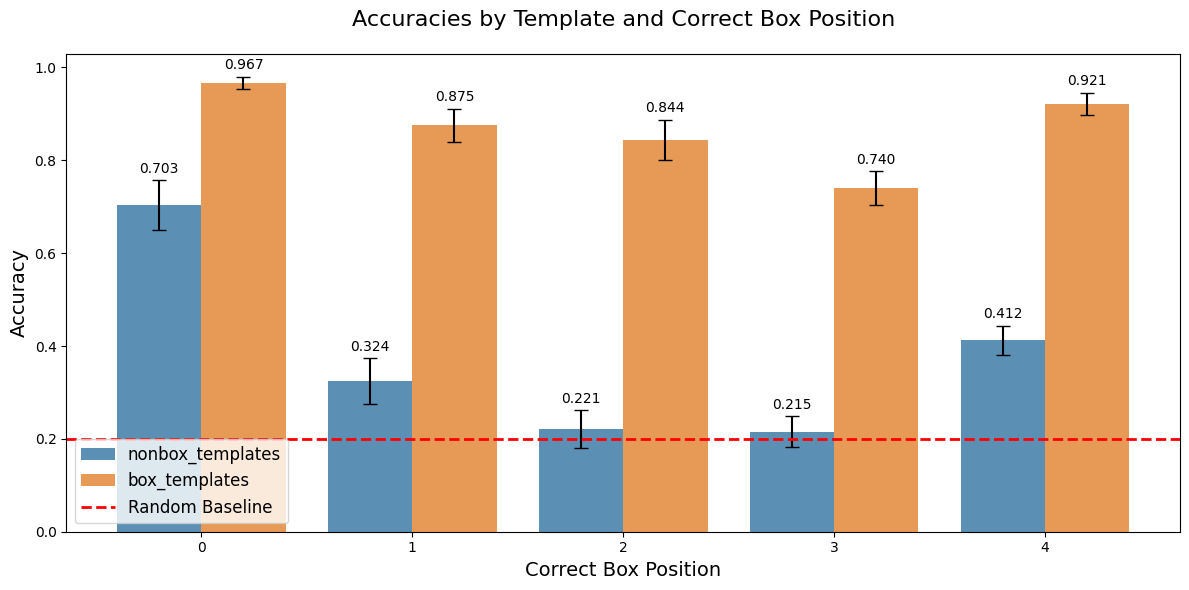

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Organize the data
# baseline_accuracies = json.load(open('baseline_accuracies2.json', 'r'))

data_list = []
    
for template, question_orders in baseline_accuracies.items():
    for question_order, accuracies in question_orders.items():
        data_list.append({
            'Template': template,
            'Question Order': str(question_order),
            'Accuracy': np.mean(accuracies),
            'Std': np.std(accuracies)
        })

df = pd.DataFrame(data_list)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the grouped bar plot
ax = sns.barplot(
    data=df,
    x='Question Order',
    y='Accuracy',
    hue='Template',
    alpha=0.8  # Bar transparency
)

# Add error bars manually
for i, Template in enumerate(df['Template'].unique()):
    Template_data = df[df['Template'] == Template]
    x = np.arange(len(Template_data['Question Order']))
    # Adjust x positions for grouped bars
    x = x + (i - 0.5 * (len(df['Template'].unique()) - 1)) * 0.8/len(df['Template'].unique())
    
    plt.errorbar(
        x=x,
        y=Template_data['Accuracy'],
        yerr=Template_data['Std'],
        fmt='none',
        color='black',
        capsize=5,
        capthick=1,
        linewidth=1.5
    )
    
    # Add value labels manually
    for j, (acc, std) in enumerate(zip(Template_data['Accuracy'], Template_data['Std'])):
        plt.text(x[j], acc + std + 0.01, f'{acc:.3f}', 
                ha='center', va='bottom')

# Add random baseline as red constant line at 0.2
ax.axhline(y=0.2, color='red', linestyle='--', linewidth=2, label='Random Baseline')

# Customize the plot
plt.title('Accuracies by Template and Correct Box Position', pad=20, fontsize=16)
plt.xlabel('Correct Box Position', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Increase legend font size
ax.legend(fontsize=12, loc='lower left')

plt.show()